In [5]:
import os                   # to interact with the operating system
import glob

import numpy as np
import pandas as pd
import xarray as xr

import pop_tools
import gsw                  # compute potential density

import matplotlib as mpl
import matplotlib.pyplot as plt
import cartopy
import cmocean.cm as cmo
import matplotlib.ticker as ticker

from matplotlib import animation, gridspec

ccrs = cartopy.crs

# Plot Winter PSL flip book

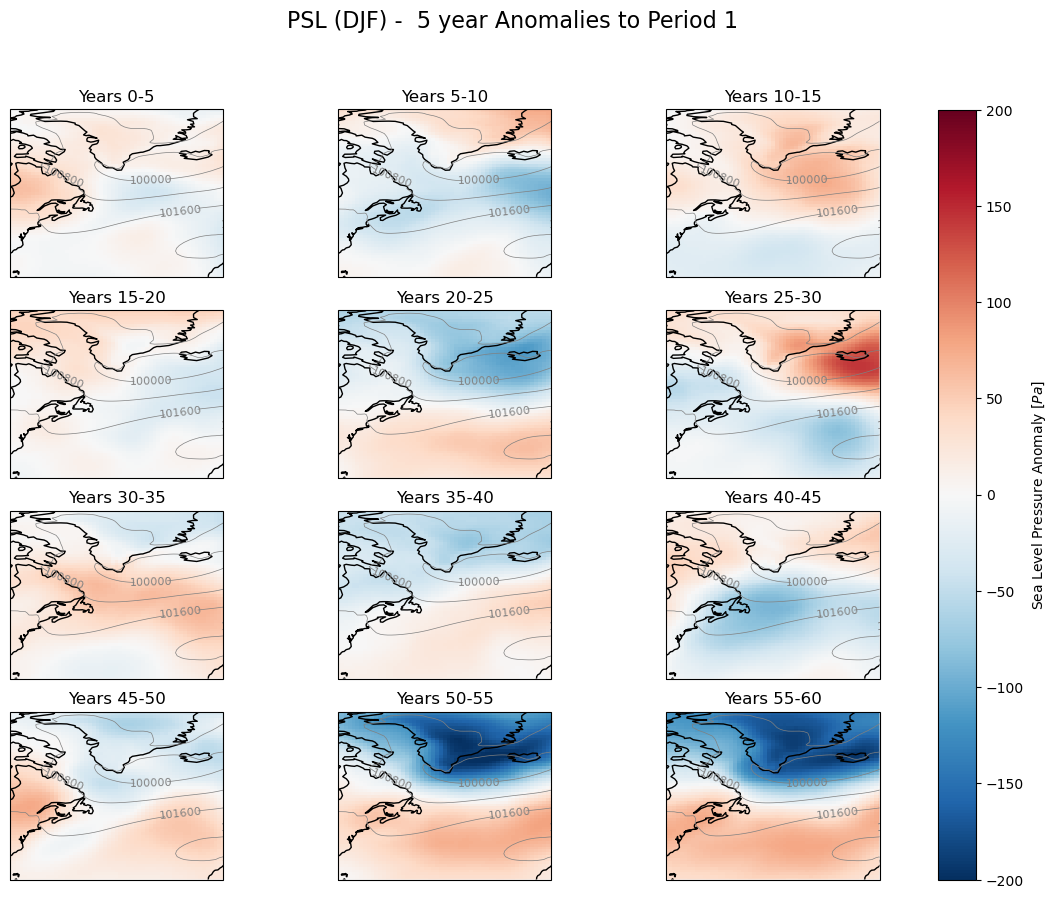

In [13]:
ds_var_annual = xr.open_dataset('/Data/gfi/share/ModData/CESM2_LENS2/ocean/monthly/comp/DJF_PSLcomposite.nc')
ds = ds_var_annual - ds_var_annual.isel(time=slice(0,40)).mean('time')

vmin = -200
vmax = -vmin

fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(15, 10), subplot_kw={'projection': ccrs.PlateCarree()})
for i, ax in enumerate(axes.flatten()):
    pc = ds['PSL'].isel(time=range(i * 5, i * 5 + 5)).mean('time').plot.pcolormesh(ax=ax, 
                                                                                    transform=ccrs.PlateCarree(),
                                                                                    x='lon', 
                                                                                    y='lat',
                                                                                    cmap='RdBu_r',
                                                                                    vmin = vmin, vmax = vmax,
                                                                                    add_colorbar=False,) 
    ax.set_extent([-80,-10, 25, 80], crs=ccrs.PlateCarree())
    ax.set_title(f"Years {(i*5)}-{(i*5)+5}")
    ax.coastlines()
    cs = ax.contour(ds.lon, ds.lat, ds_var_annual['PSL'].isel(time=slice(0, 40)).mean('time'), linewidths=0.5, colors='gray',transform=ccrs.PlateCarree())
    ax.clabel(cs, fmt='%1.0f', inline=True, fontsize=8)
cbar = fig.colorbar(pc, ax=axes, orientation='vertical', label=r'Sea Level Pressure Anomaly [$Pa$]')
fig.suptitle('PSL (DJF) -  5 year Anomalies to Period 1', fontsize=16)
#plt.show()
plt.savefig(os.path.expanduser('~/phase1_CONDA/results/')+'DJF_PSL_flipbook.png', bbox_inches='tight', dpi=300)    

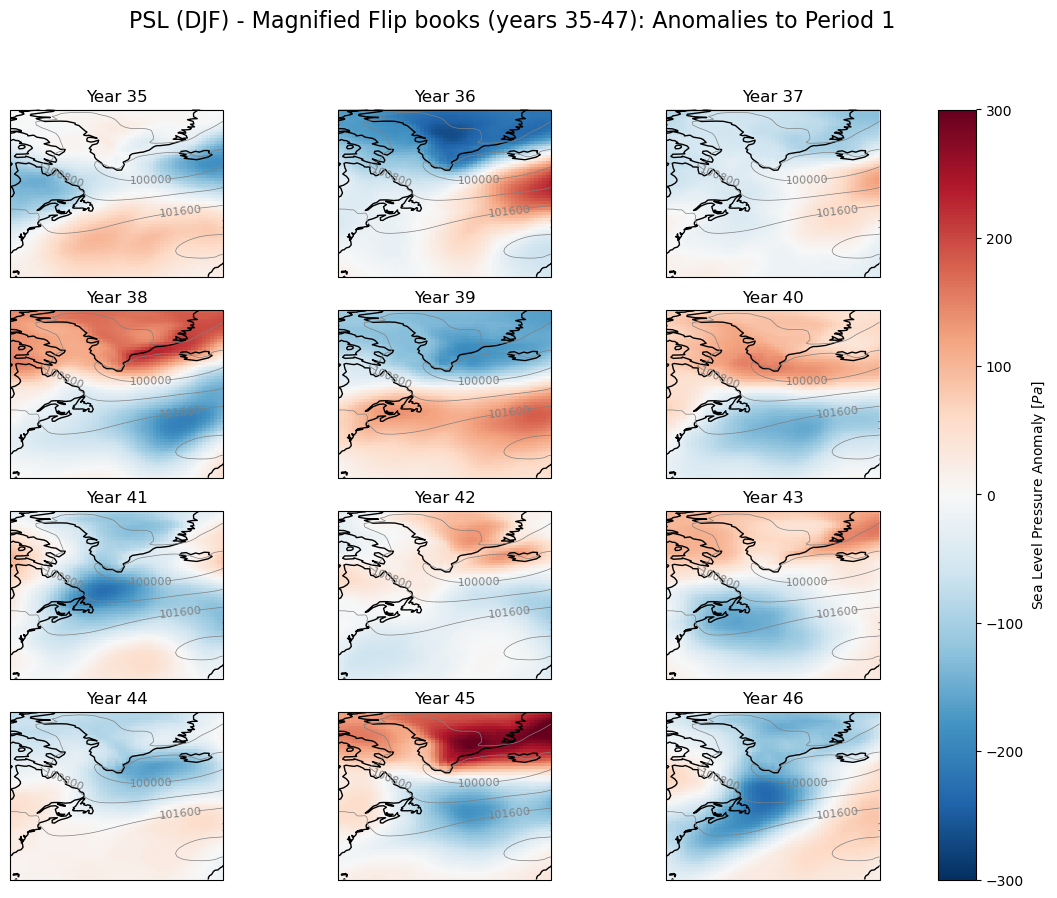

In [14]:
vmin = -300
vmax = -vmin

fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(15, 10), subplot_kw={'projection': ccrs.PlateCarree()})
for i, ax in enumerate(axes.flatten()):
    pc = ds['PSL'].isel(time=35+i).plot.pcolormesh(ax=ax, 
                                                    transform=ccrs.PlateCarree(),
                                                    x='lon', 
                                                    y='lat',
                                                    cmap='RdBu_r',
                                                    vmin = vmin, vmax = vmax,
                                                    add_colorbar=False,) 
    ax.set_extent([-80,-10, 25, 80], crs=ccrs.PlateCarree())
    ax.set_title(f"Year {35+i}")
    ax.coastlines()
    cs = ax.contour(ds.lon, ds.lat, ds_var_annual['PSL'].isel(time=slice(0, 40)).mean('time'), linewidths=0.5, colors='gray',transform=ccrs.PlateCarree())
    ax.clabel(cs, fmt='%1.0f', inline=True, fontsize=8)
cbar = fig.colorbar(pc, ax=axes, orientation='vertical', label=r'Sea Level Pressure Anomaly [$Pa$]')
fig.suptitle('PSL (DJF) - Magnified Flip books (years 35-47): Anomalies to Period 1', fontsize=16)
#plt.plot()
plt.savefig(os.path.expanduser('~/phase1_CONDA/results/')+'DJF_PSL_flipbook_zoomed.png', bbox_inches='tight', dpi=300)    

